In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
data=data.drop(columns=['Unnamed: 0'])

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, day
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [8]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [9]:
data=data.drop(columns=['Date'])

In [10]:
data['XLarge Bags']=data['XLarge Bags'].replace(0,data['XLarge Bags'].mean())

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder( )

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [14]:
columns_to_encode = ['type','region']

for column in columns_to_encode:
    data[column] = lab_enc.fit_transform(data[column])

print(data)

       AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  month  day 

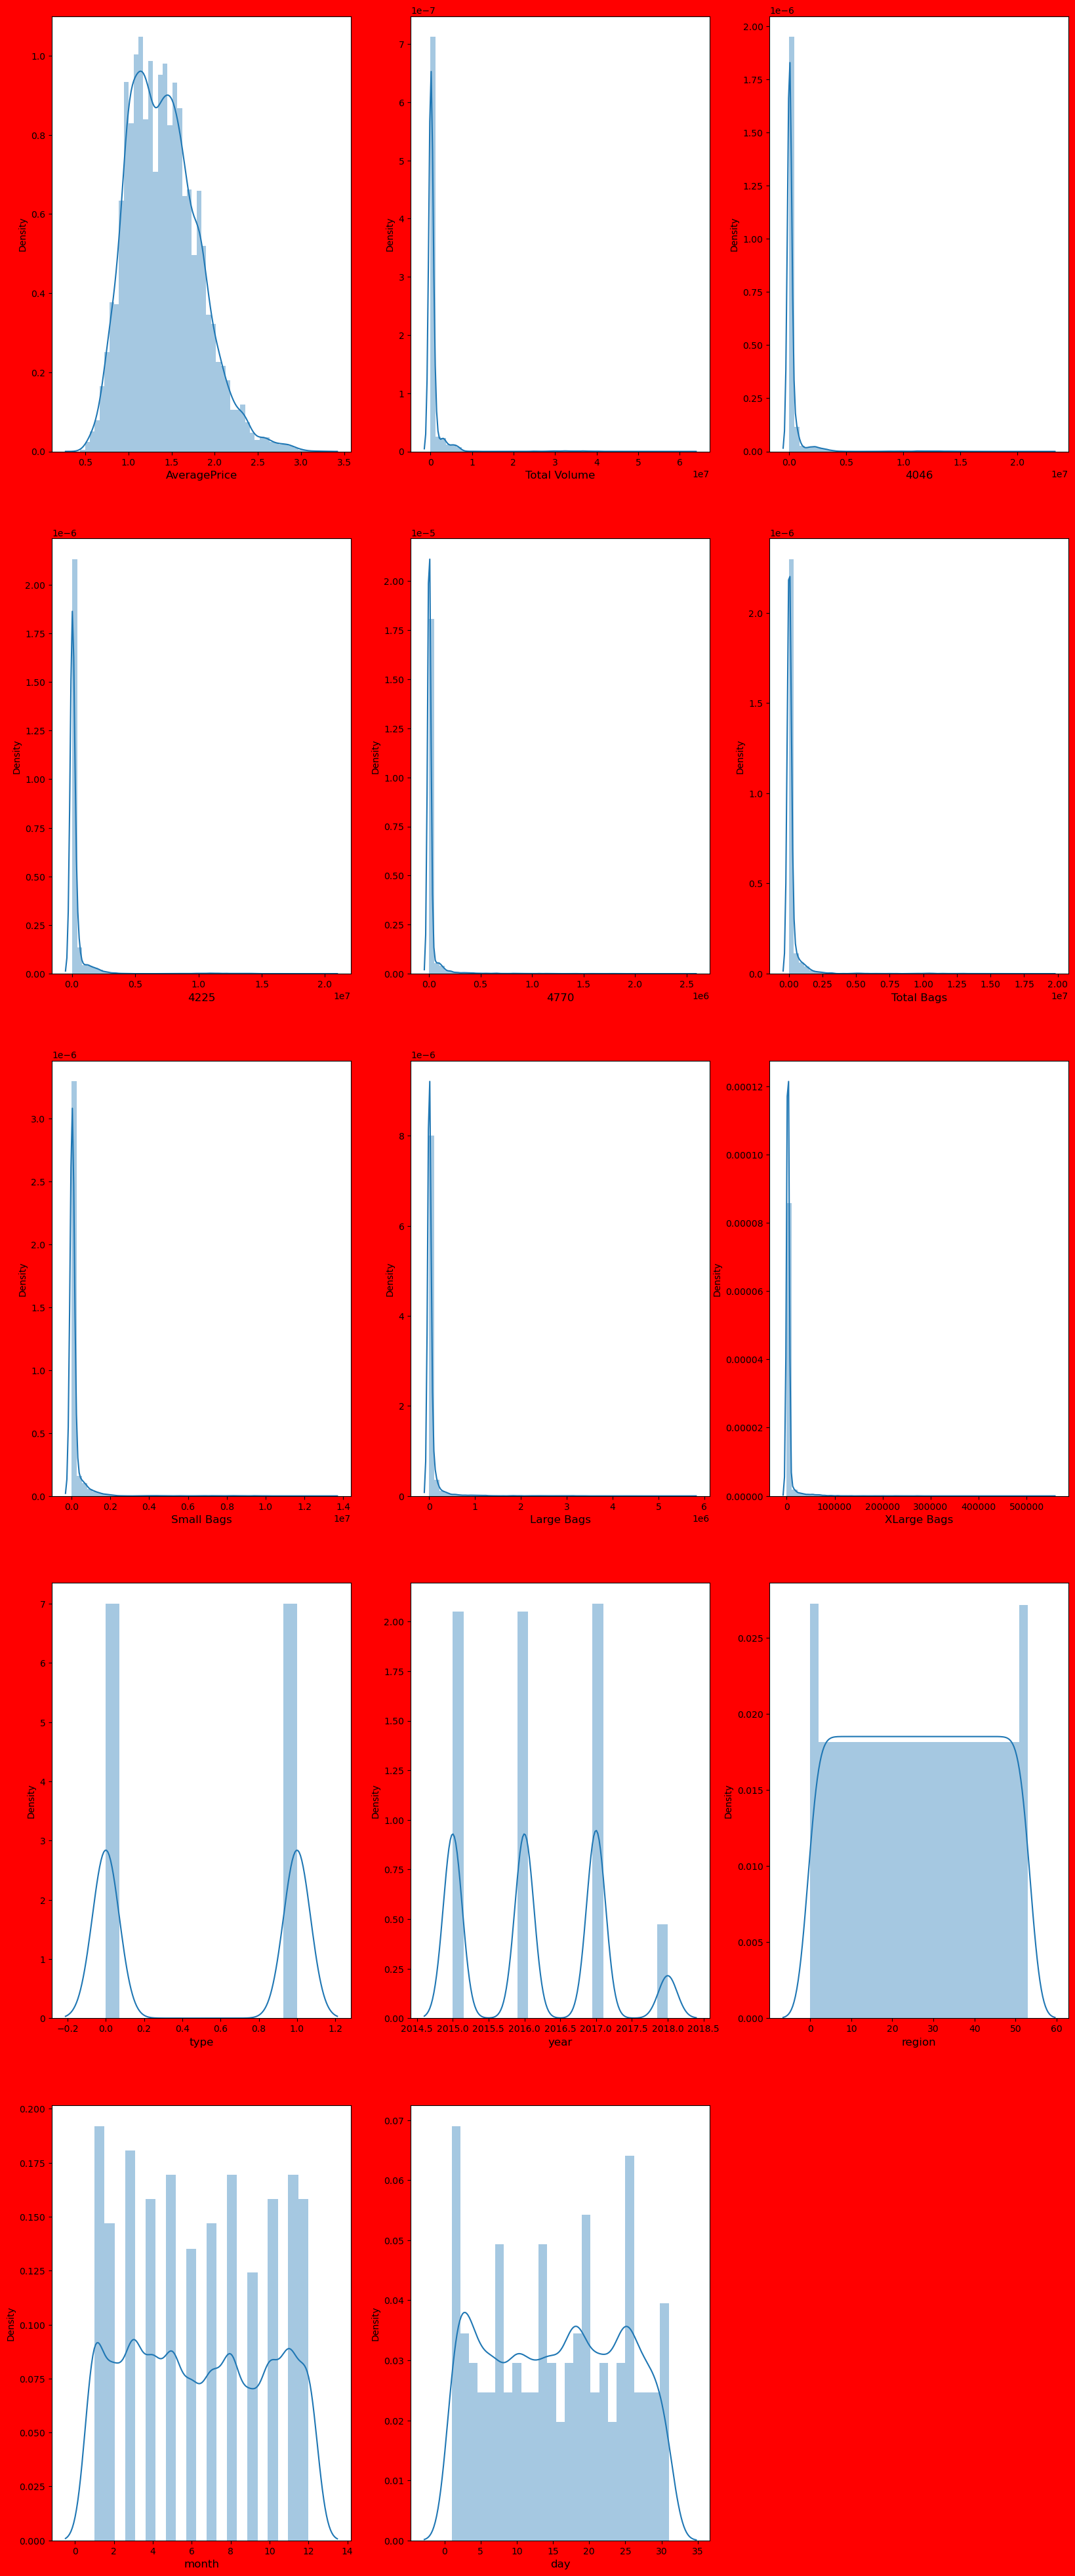

In [15]:
plt.figure(figsize=(20,50), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=14:
            plt.subplot(5,3,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=12)
            plotnumber+=1
plt.show( )

In [16]:
q1 = data['Total Volume'].quantile(0.25)
q3 = data['Total Volume'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Total Volume'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )  

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
15948,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
15949,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
15950,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [17]:
q1 = data['4046'].quantile(0.25)
q3 = data['4046'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['4046'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
14127,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
14128,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
14129,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [18]:
q1 = data['4225'].quantile(0.25)
q3 = data['4225'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['4225'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
12475,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
12476,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
12477,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [19]:
q1 = data['4770'].quantile(0.25)
q3 = data['4770'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['4770'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10163,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
10164,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
10165,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
10166,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [20]:
q1 = data['Total Bags'].quantile(0.25)
q3 = data['Total Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Total Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8892,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
8893,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
8894,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
8895,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [21]:
q1 = data['Small Bags'].quantile(0.25)
q3 = data['Small Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Small Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
7905,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
7906,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
7907,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [22]:
q1 = data['Large Bags'].quantile(0.25)
q3 = data['Large Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Large Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
6843,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
6844,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
6845,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [23]:
q1 = data['XLarge Bags'].quantile(0.25)
q3 = data['XLarge Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['XLarge Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
6843,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
6844,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
6845,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


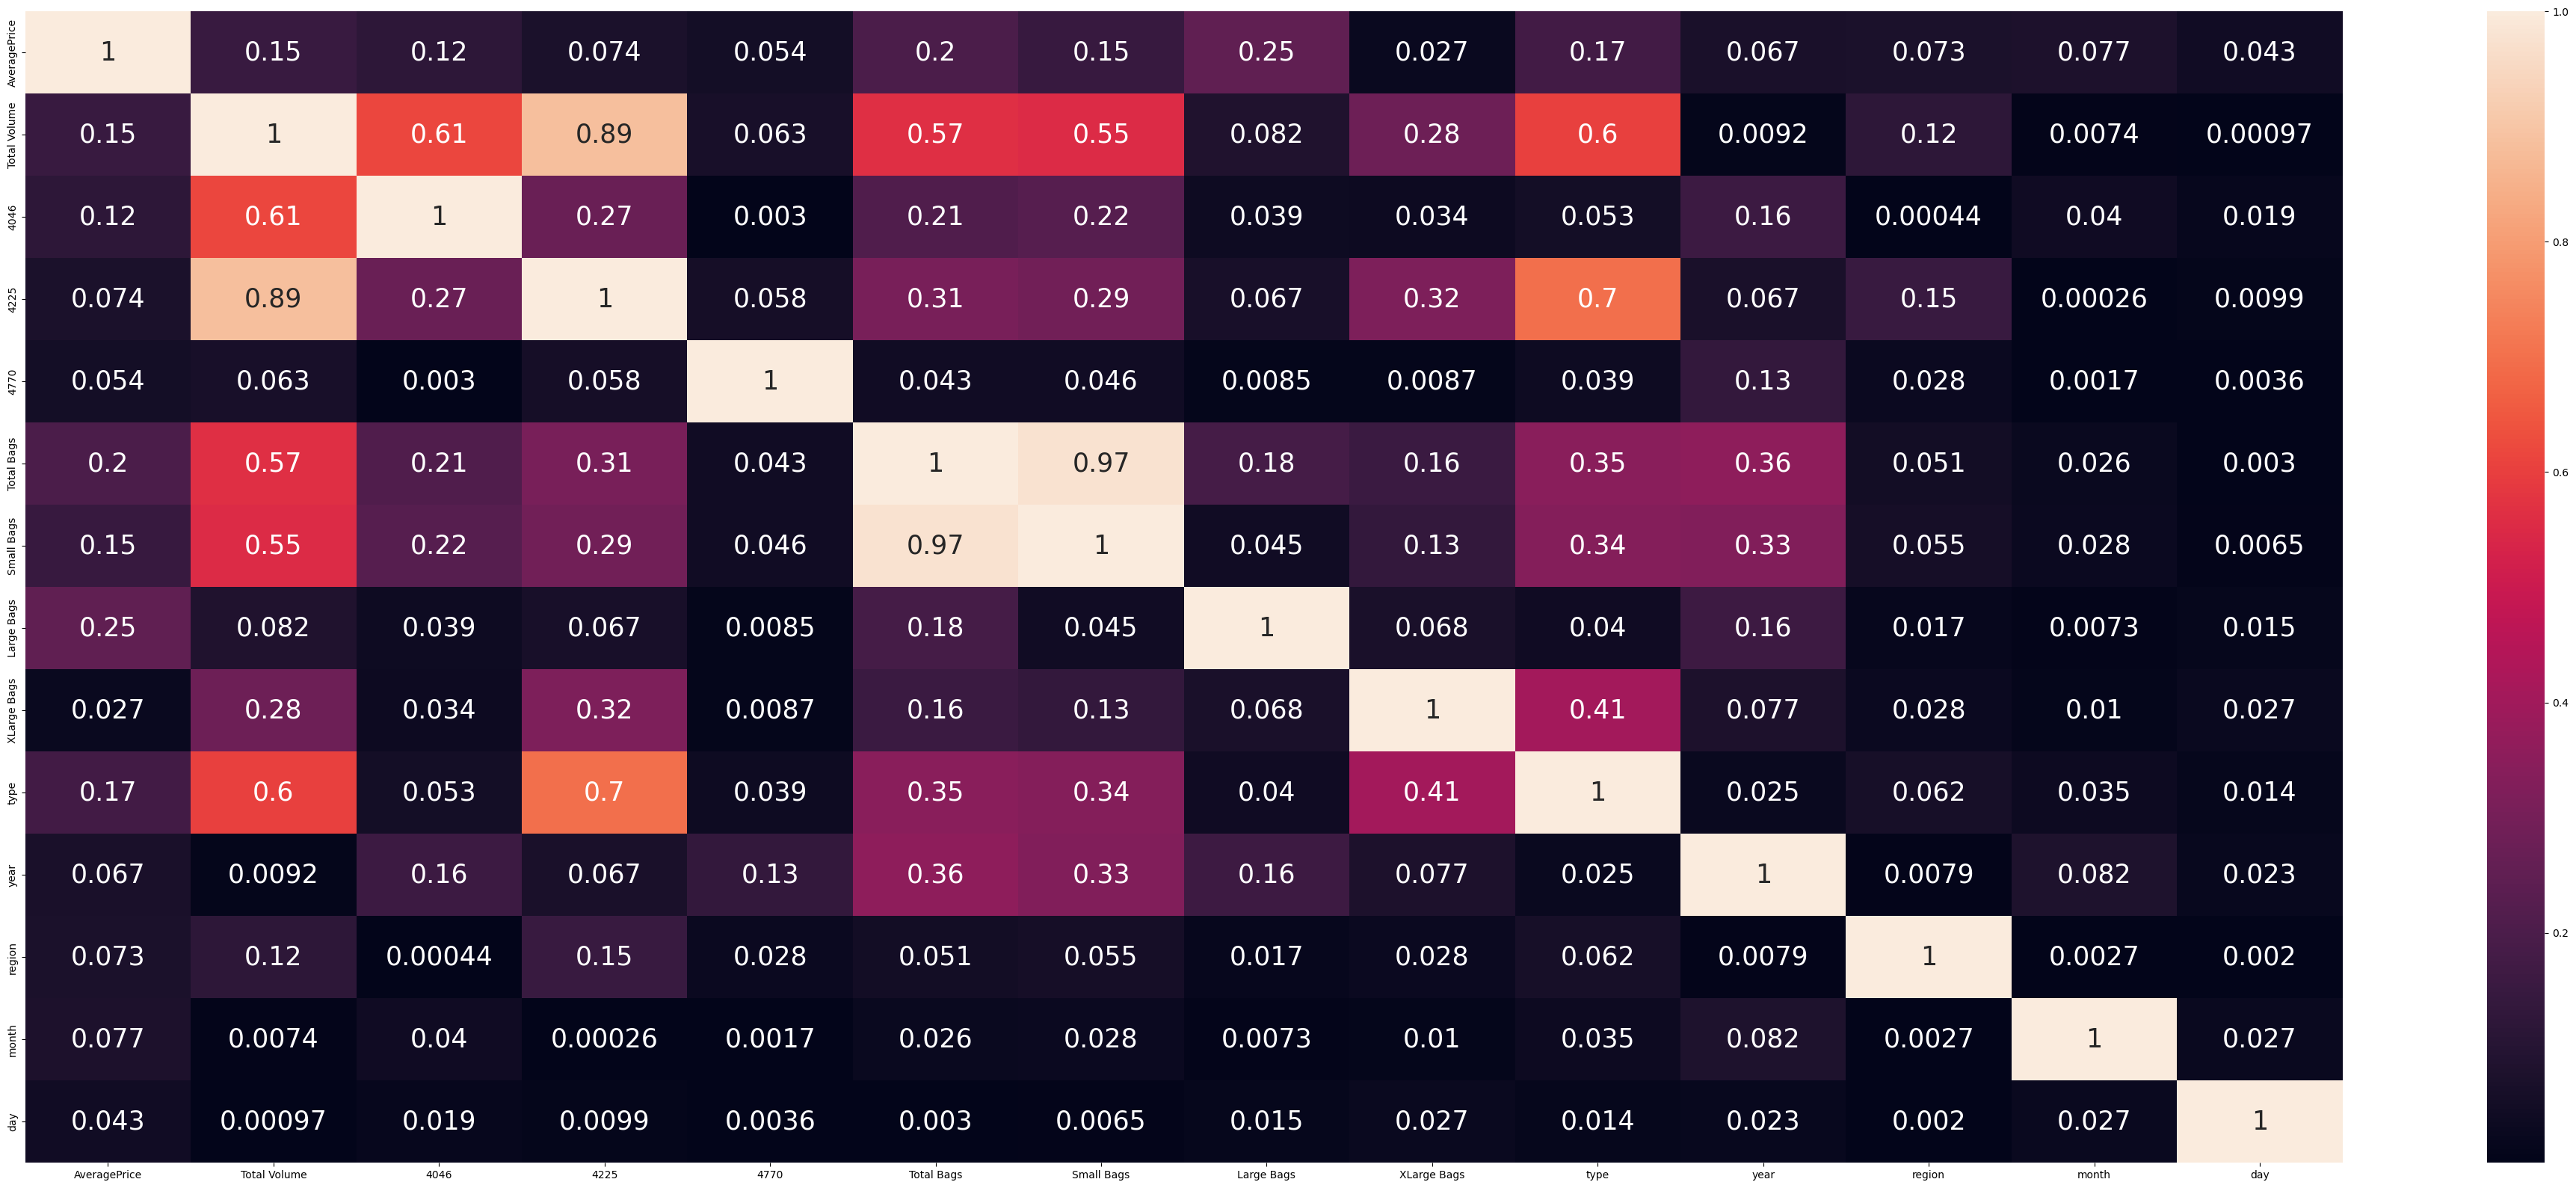

In [24]:
# plotting Heatmap (Correlation matrix) it’s a technique to find relationship strength between features and labels and among labels (multi-collinearity)
# VIF and K_best are also possible methods but most convenient is heatmap because of its color based visulaization
df_corr = data.corr().abs()
plt.figure(figsize=(50, 20))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 25})
plt.show()

In [25]:
# 4225 has collinearity with type and Total Volume , So dropping it would be feasible
X=data.drop(columns=['4225','region'])
Y=data['region']

In [26]:
scalar=StandardScaler(  )
X_scalar= scalar.fit_transform (X)

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scalar,Y, test_size=0.25, random_state=41)

In [28]:
def metric_score(clf, X_train, X_test, Y_train, Y_test, train=True):
    if train:
        Y_pred = clf.predict(X_train)
        print("\n==============train Results==============")
        print(f"Accuracy Score: {accuracy_score(Y_train, Y_pred) * 100:.2f}%")

    elif not train:
        Y_pred = clf.predict(X_test)
        print("\n==============test Results==============\n")
        print(f"Accuracy Score: {accuracy_score(Y_test, Y_pred) * 100:.2f}%")
        print("\n\nTest Classification Report\n", classification_report(Y_test, Y_pred, digits=2))


In [29]:
Knn=KNeighborsClassifier( )

In [30]:
#Model training

Knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [31]:
#Call the function and pass dataset to check train and test scores

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 56.38%

==============test Results==============

Accuracy Score: 33.76%


Test Classification Report
               precision    recall  f1-score   support

           0       0.28      0.66      0.39        74
           1       0.12      0.25      0.16        32
           2       0.87      0.72      0.79        36
           3       0.12      0.22      0.16        45
           4       0.42      0.49      0.45        35
           5       0.24      0.32      0.27        44
           6       0.91      0.91      0.91        11
           7       0.58      0.50      0.54        42
           8       0.82      0.92      0.87        36
           9       0.24      0.41      0.30        22
          10       0.03      0.09      0.04        23
          11       0.56      0.57      0.56        44
          12       0.33      0.18      0.23        17
          13       0.08      0.12      0.10        26
          14       0.15    

In [32]:
Y_pred=Knn.predict(X_test)
Y_pred

array([34, 21,  0, ..., 16,  2, 39])

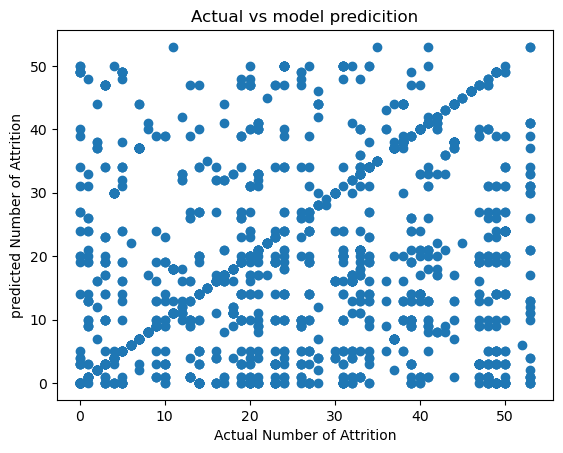

In [33]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual Number of Attrition')
plt.ylabel('predicted Number of Attrition')
plt.title('Actual vs model predicition')
plt.show( )

In [35]:
# Selecting optimum parameters through GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid= { 'algorithm': ['kd_tree', 'brute'],
                        'leaf_size' : [3,5,6,7,8],
                         'n_neighbors':[3,5,7,9,11,13]}

In [36]:
gridsearch=GridSearchCV (estimator=Knn, param_grid=param_grid)

In [37]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [38]:
gridsearch.best_score_

0.3267770204479065

In [39]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [41]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [42]:
#Call the function and pass dataset to check train and test scores

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)
metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 60.27%

==============test Results==============

Accuracy Score: 33.47%


Test Classification Report
               precision    recall  f1-score   support

           0       0.34      0.70      0.46        74
           1       0.13      0.28      0.18        32
           2       0.81      0.72      0.76        36
           3       0.10      0.20      0.13        45
           4       0.35      0.51      0.41        35
           5       0.21      0.27      0.24        44
           6       0.92      1.00      0.96        11
           7       0.64      0.60      0.62        42
           8       0.81      0.94      0.87        36
           9       0.14      0.27      0.18        22
          10       0.07      0.30      0.12        23
          11       0.53      0.59      0.56        44
          12       0.33      0.24      0.28        17
          13       0.07      0.12      0.09        26
          14       0.12    

In [49]:
Knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [50]:
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=9)

In [51]:
metric_score(Knn, X_train,X_test,Y_train,Y_test, train=True)

metric_score(Knn, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 50.71%

==============test Results==============

Accuracy Score: 34.70%


Test Classification Report
               precision    recall  f1-score   support

           0       0.30      0.72      0.42        74
           1       0.15      0.19      0.17        32
           2       0.88      0.64      0.74        36
           3       0.13      0.20      0.16        45
           4       0.45      0.57      0.51        35
           5       0.30      0.23      0.26        44
           6       0.91      0.91      0.91        11
           7       0.57      0.48      0.52        42
           8       0.79      0.92      0.85        36
           9       0.19      0.23      0.20        22
          10       0.05      0.13      0.07        23
          11       0.57      0.59      0.58        44
          12       0.38      0.18      0.24        17
          13       0.15      0.15      0.15        26
          14       0.20    

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
clf=DecisionTreeClassifier( )
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
metric_score(clf, X_train,X_test,Y_train,Y_test, train=True)
metric_score(clf, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 100.00%

==============test Results==============

Accuracy Score: 64.54%


Test Classification Report
               precision    recall  f1-score   support

           0       0.73      0.72      0.72        74
           1       0.48      0.47      0.48        32
           2       0.86      0.83      0.85        36
           3       0.64      0.56      0.60        45
           4       0.72      0.74      0.73        35
           5       0.44      0.57      0.50        44
           6       1.00      0.82      0.90        11
           7       0.92      0.83      0.88        42
           8       0.88      0.97      0.92        36
           9       0.71      0.68      0.70        22
          10       0.44      0.70      0.54        23
          11       0.59      0.43      0.50        44
          12       0.74      0.82      0.78        17
          13       0.56      0.54      0.55        26
          14       0.61   

In [55]:
param_grid= { 'criterion': ['gini', 'Entropy'],
                        'max_depth' : range(10,15),
                        'min_samples_leaf':range(10,15),
                        'min_samples_split':range(10,15),
                        'max_leaf_nodes':range(10,15)}

In [56]:
gridsearch=GridSearchCV (estimator=clf, param_grid=param_grid, cv=5,n_jobs=-1)

In [57]:
gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(10, 15),
                         'min_samples_leaf': range(10, 15),
                         'min_samples_split': range(10, 15)})

In [58]:
best_parameters=gridsearch.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 14, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [59]:
clf=DecisionTreeClassifier(criterion='gini', min_samples_split=10,min_samples_leaf=10,max_depth=10, max_leaf_nodes=14)

In [60]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=14, min_samples_leaf=10,
                       min_samples_split=10)

In [61]:
metric_score(clf, X_train,X_test,Y_train,Y_test, train=True)
metric_score(clf, X_train,X_test,Y_train,Y_test, train=False)


==============train Results==============
Accuracy Score: 24.56%

==============test Results==============

Accuracy Score: 22.37%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00        32
           2       0.32      0.67      0.43        36
           3       0.00      0.00      0.00        45
           4       0.71      0.49      0.58        35
           5       0.00      0.00      0.00        44
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00        42
           8       0.54      0.75      0.63        36
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        23
          11       0.13      0.91      0.23        44
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00        26
          14       0.00    

In [ ]:
# For Region Classification Simple Decision Tree Algorithm has given the highest training and testing Accuracy of 100% and 64.5% respectively

In [62]:
# Regression predicting Average Price
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [79]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6847 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  6847 non-null   float64
 1   Total Volume  6847 non-null   float64
 2   4046          6847 non-null   float64
 3   4225          6847 non-null   float64
 4   4770          6847 non-null   float64
 5   Total Bags    6847 non-null   float64
 6   Small Bags    6847 non-null   float64
 7   Large Bags    6847 non-null   float64
 8   XLarge Bags   6847 non-null   float64
 9   type          6847 non-null   int32  
 10  year          6847 non-null   int64  
 11  region        6847 non-null   int32  
 12  month         6847 non-null   int64  
 13  day           6847 non-null   int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 748.9 KB


In [81]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
count,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000,6847.000000
mean,1.695442,13139.407501,2370.935056,5896.584850,59.147558,4812.129287,4096.411960,708.656676,3077.191975,0.969038,2016.049219,25.350080,6.400613,15.559953
std,0.345739,17948.991190,6574.600794,12582.391978,166.103204,4884.364757,4788.903896,1107.418474,281.213309,0.173229,0.941808,15.759679,3.529065,8.979032
min,0.720000,84.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.460000,3721.535000,89.030000,349.665000,0.000000,1232.185000,651.080000,0.000000,3106.426507,1.000000,2015.000000,11.000000,3.000000,8.000000
50%,1.660000,7676.740000,504.110000,1925.800000,0.000000,3089.510000,2056.670000,106.660000,3106.426507,1.000000,2016.000000,24.000000,6.000000,16.000000
75%,1.890000,14398.745000,1819.495000,4773.680000,8.335000,6811.370000,6064.950000,1009.715000,3106.426507,1.000000,2017.000000,39.000000,10.000000,23.000000
max,3.250000,196031.900000,142332.450000,126551.000000,1025.960000,26419.210000,21956.660000,4986.650000,3106.426507,1.000000,2018.000000,53.000000,12.000000,31.000000


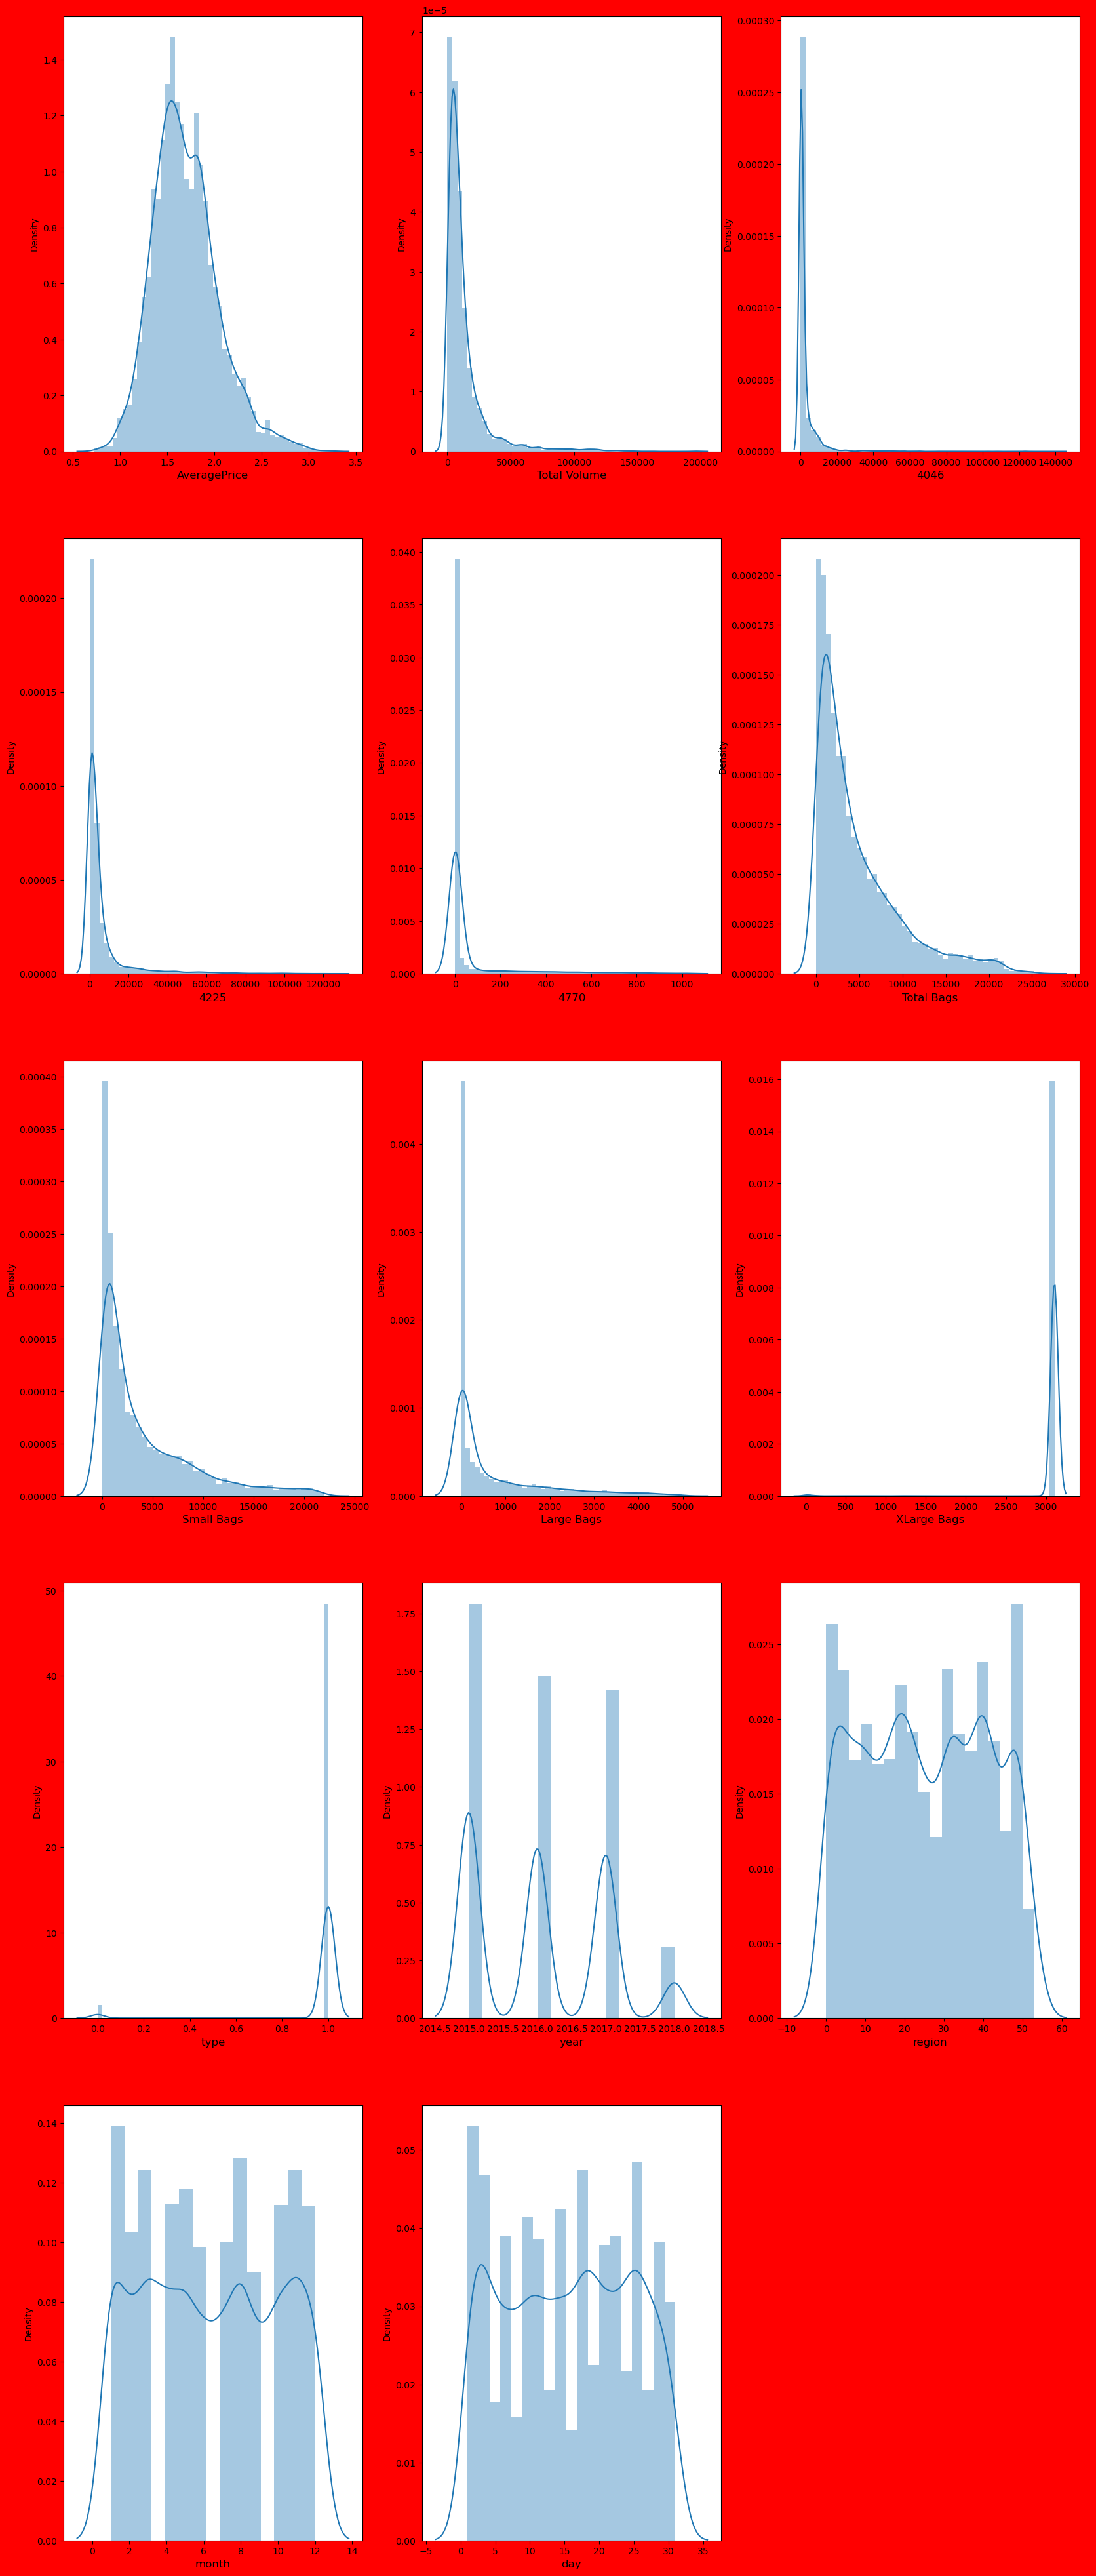

In [82]:
plt.figure(figsize=(20,50), facecolor='red')
plotnumber=1
for column in data:
      if plotnumber<=14:
            plt.subplot(5,3,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column, fontsize=12)
            plotnumber+=1
plt.show( )

In [84]:
q1 = data['XLarge Bags'].quantile(0.25)
q3 = data['XLarge Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q1 - (1.5 * iqr))

np_index = np.where(data['XLarge Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6842,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
6843,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
6844,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
6845,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [85]:
q1 = data['Large Bags'].quantile(0.25)
q3 = data['Large Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Large Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
6206,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
6207,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
6208,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [86]:
q1 = data['Small Bags'].quantile(0.25)
q3 = data['Small Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Small Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,3106.426507,1,2018,53,4,2
5875,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
5876,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
5877,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [87]:
q1 = data['Total Bags'].quantile(0.25)
q3 = data['Total Bags'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Total Bags'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0,12,20
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0,12,13
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0,6,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,18243,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,3106.426507,1,2018,53,11,2
5720,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
5721,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
5722,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [88]:
q1 = data['4225'].quantile(0.25)
q3 = data['4225'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['4225'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,9126,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,3106.426507,1,2015,0,12,27
1,9127,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,3106.426507,1,2015,0,12,20
2,9128,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,3106.426507,1,2015,0,12,13
3,9129,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,3106.426507,1,2015,0,6,12
4,9130,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,3106.426507,1,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5126,18243,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,3106.426507,1,2018,53,11,2
5127,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
5128,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
5129,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [89]:
q1 = data['4046'].quantile(0.25)
q3 = data['4046'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['4046'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,9126,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,3106.426507,1,2015,0,12,27
1,9127,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,3106.426507,1,2015,0,12,20
2,9128,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,3106.426507,1,2015,0,12,13
3,9129,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,3106.426507,1,2015,0,6,12
4,9130,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,3106.426507,1,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,18243,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,3106.426507,1,2018,53,11,2
4549,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
4550,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21
4551,18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,3106.426507,1,2018,53,1,14


In [91]:
q1 = data['Total Volume'].quantile(0.25)
q3 = data['Total Volume'].quantile(0.75)

iqr = q3 - q1

DFH = (q3 + (1.5 * iqr))

np_index = np.where(data['Total Volume'] > DFH)
np_index
data=data.drop(data.index[np_index])
data.shape
data.reset_index( )

,index,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,9126,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,3106.426507,1,2015,0,12,27
1,9127,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,3106.426507,1,2015,0,12,20
2,9128,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,3106.426507,1,2015,0,12,13
3,9129,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,3106.426507,1,2015,0,6,12
4,9130,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,3106.426507,1,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,18238,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,3106.426507,1,2018,53,3,18
4463,18243,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,3106.426507,1,2018,53,11,2
4464,18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,3106.426507,1,2018,53,1,28
4465,18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,3106.426507,1,2018,53,1,21


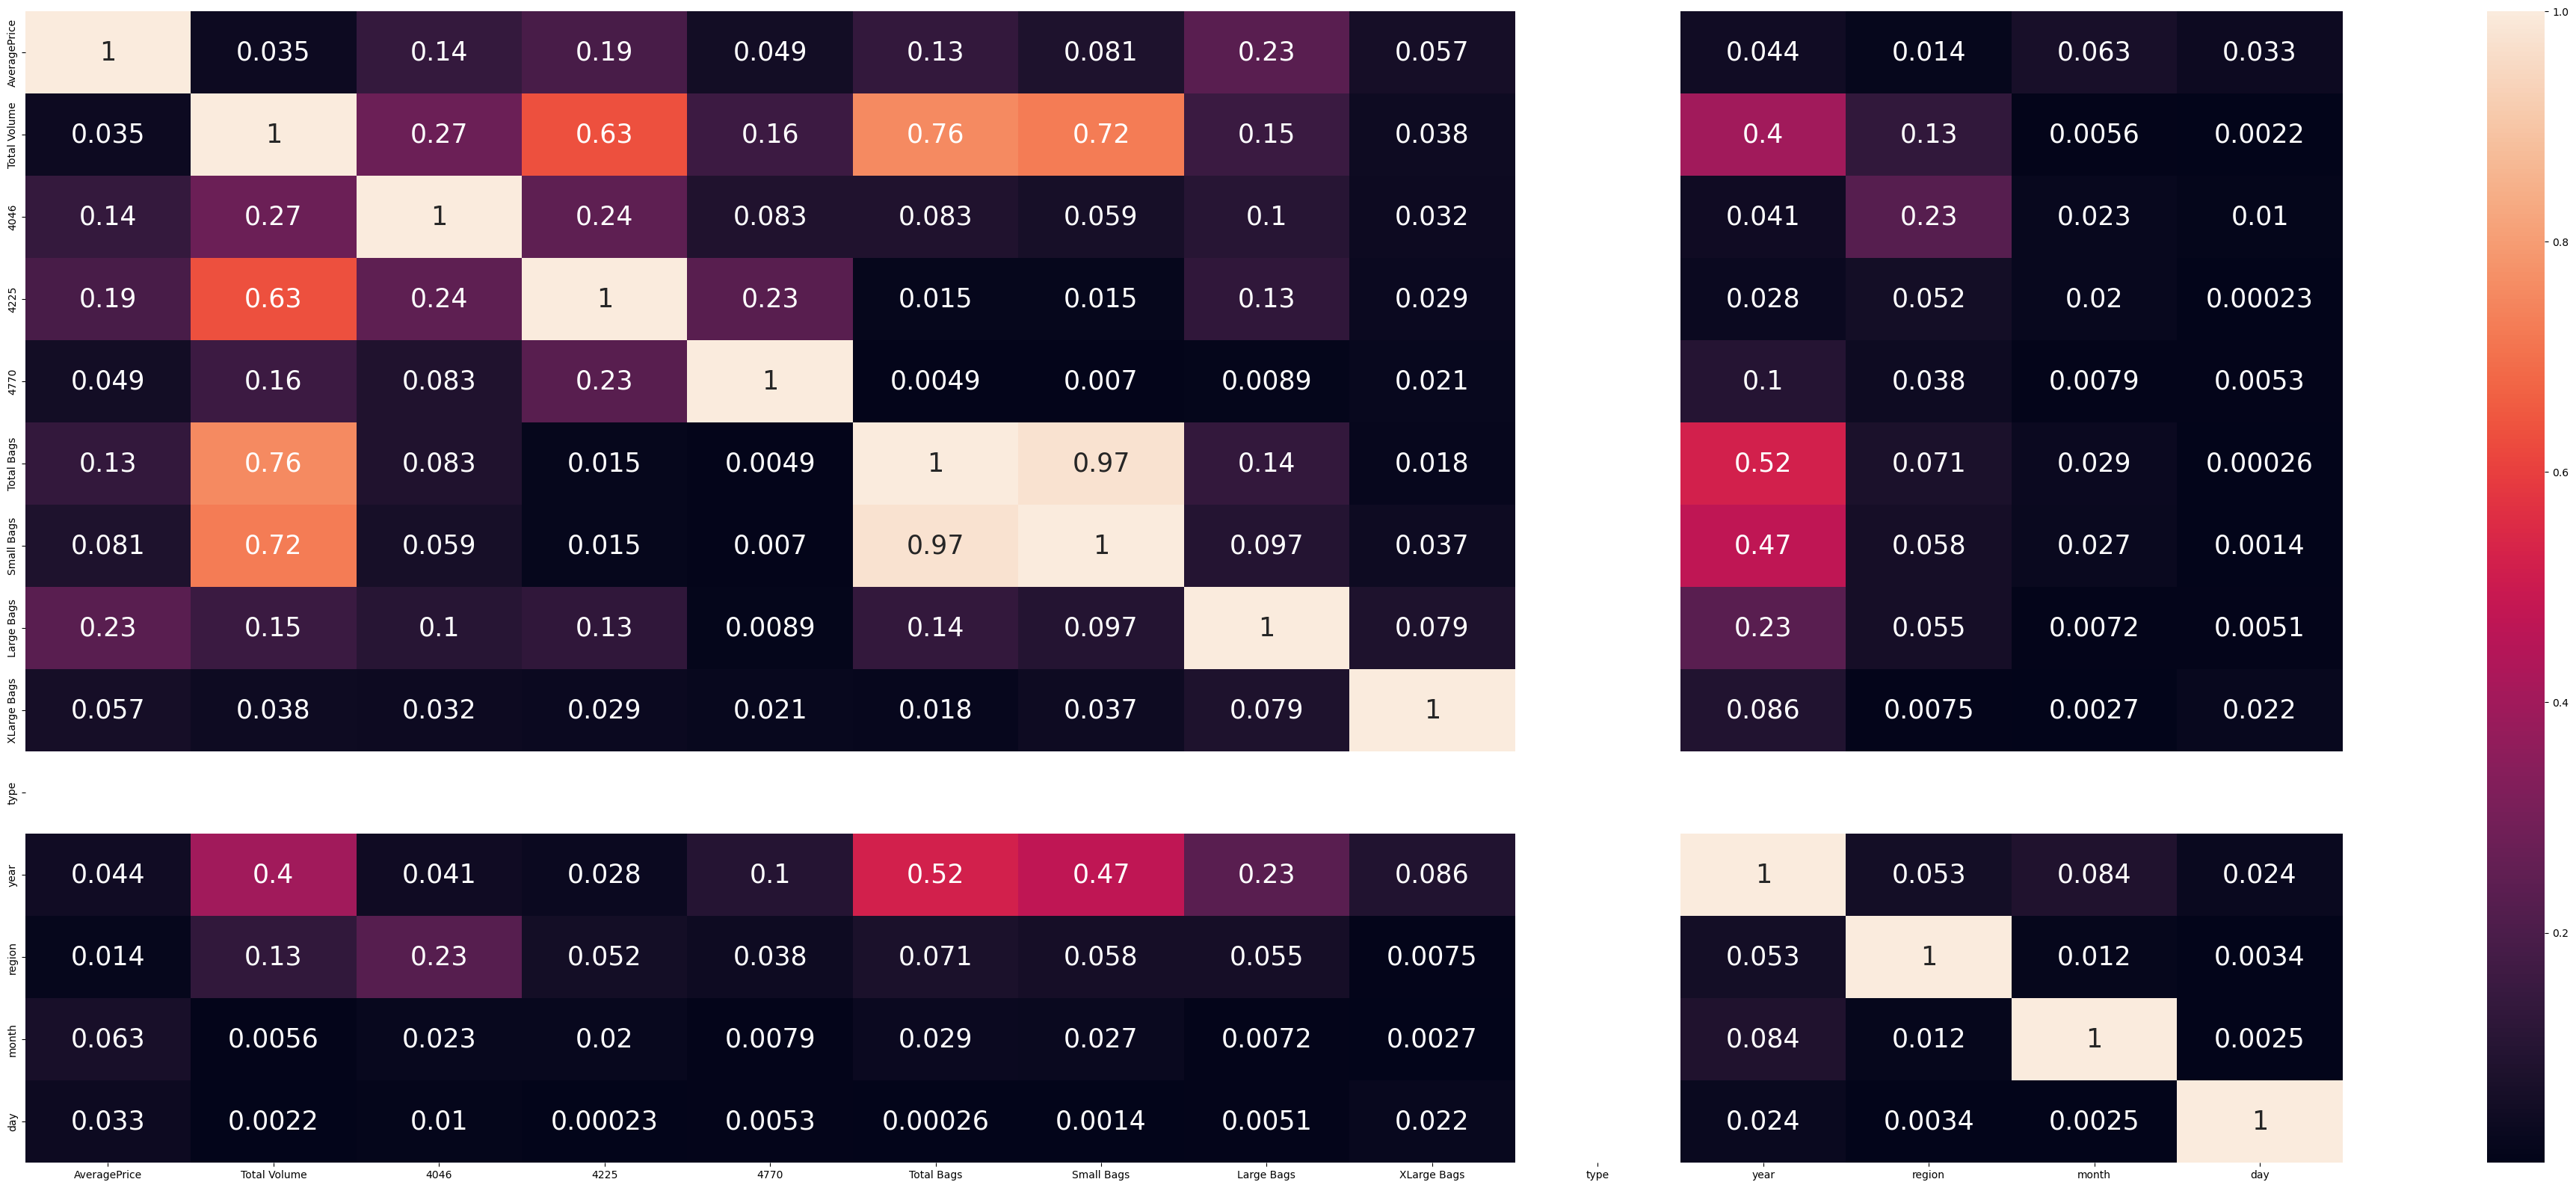

In [92]:
# plotting Heatmap (Correlation matrix) it’s a technique to find relationship strength between features and labels and among labels (multi-collinearity)
# VIF and K_best are also possible methods but most convenient is heatmap because of its color based visulaization
df_corr = data.corr().abs()
plt.figure(figsize=(50, 20))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 25})
plt.show()

In [93]:
X=data.drop(columns=['4225','AveragePrice'])
Y=data['AveragePrice']

In [94]:
scalar=StandardScaler(  )
X_scalar= scalar.fit_transform (X)

In [95]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scalar,Y, test_size=0.25, random_state=41)

In [96]:
def metric_score(pred, X_train, X_test, Y_train, Y_test, train=True):
    if train:
        Y_pred_train = pred.predict(X_train)
        print('\n============== Train Results ==============')
        print(f'r2_score: {r2_score(Y_train, Y_pred_train) * 100:.2f}%')
        
       
    else:
        Y_pred_test = pred.predict(X_test)
        print("\n============== Test Results ==============\n")
        print(f'r2_score: {r2_score(Y_test, Y_pred_test) * 100:.2f}%')
        print(f'Mean_Absolute_Error: {mean_absolute_error(Y_test, Y_pred_test):.2f}%')
        print(f'Mean_Squared_Error: {mean_squared_error(Y_test, Y_pred_test):.2f}%')
        print(f'Root_Mean_Squared_Error: {np.sqrt(mean_squared_error(Y_test, Y_pred_test)):.2f}%')
        

In [97]:
#Initialize Model
lin_reg=LinearRegression( )
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [98]:
metric_score(lin_reg, X_train,X_test,Y_train,Y_test, train=True)

metric_score(lin_reg, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=lin_reg.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 17.25%

============== Test Results ==============

r2_score: 14.12%
Mean_Absolute_Error: 0.24%
Mean_Squared_Error: 0.09%
Root_Mean_Squared_Error: 0.30%


array([1.81487494, 1.91574997, 1.79016511, ..., 1.82911637, 1.54474609,
       1.71601803])

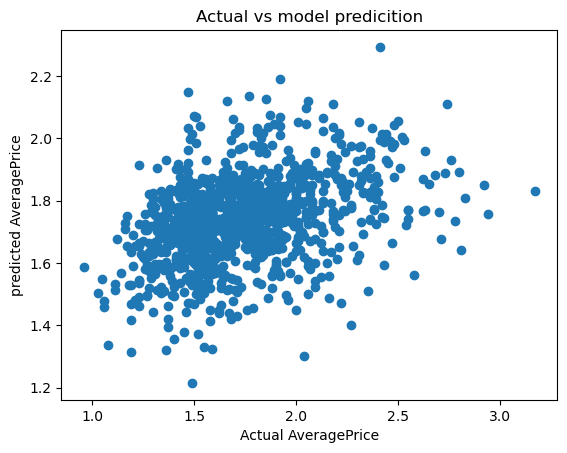

In [99]:
plt.scatter(Y_test,Y_pred)    
plt.xlabel('Actual AveragePrice')
plt.ylabel('predicted AveragePrice')
plt.title('Actual vs model predicition')
plt.show( )

In [100]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [101]:
lasscv=LassoCV(alphas=None, max_iter=30)
lasscv.fit(X_train,Y_train)

LassoCV(max_iter=30)

In [102]:
metric_score(lasscv, X_train,X_test,Y_train,Y_test, train=True)

metric_score(lasscv, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=lasscv.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 17.16%

============== Test Results ==============

r2_score: 14.35%
Mean_Absolute_Error: 0.23%
Mean_Squared_Error: 0.09%
Root_Mean_Squared_Error: 0.30%


array([1.81268627, 1.9121159 , 1.78696044, ..., 1.82921101, 1.55085123,
       1.71465494])

In [103]:
ridgecv = RidgeCV(alphas=np.arange(0.001, 0.1, 0.01))
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [104]:
metric_score(ridgecv, X_train,X_test,Y_train,Y_test, train=True)

metric_score(ridgecv, X_train,X_test,Y_train,Y_test, train=False)

Y_pred=ridgecv.predict(X_test)
Y_pred


============== Train Results ==============
r2_score: 17.20%

============== Test Results ==============

r2_score: 14.27%
Mean_Absolute_Error: 0.24%
Mean_Squared_Error: 0.09%
Root_Mean_Squared_Error: 0.30%


array([1.81465847, 1.91560503, 1.7905349 , ..., 1.82926092, 1.54510686,
       1.71620358])

In [106]:
# Among all Lassocv algorithm is better